In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:

data = pd.read_excel('Superstorecleaned.xlsx')

In [3]:
data

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,City,Region,Order_Date,Ship_Date,Postal Code
0,24599,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.820,2,0.0,102.420,39.66,Medium,Henderson,South,2020-03-22,2020-03-29,42420
1,29465,ID-2015-BD116051-42248,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.540,9,0.0,104.490,18.72,Medium,Henderson,South,2018-09-01,2018-09-04,42420
2,24598,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.320,3,0.0,13.770,14.10,Medium,Los Angeles,West,2020-03-22,2020-03-29,90036
3,24597,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.680,4,0.0,79.680,11.01,Medium,Fort Lauderdale,South,2020-03-22,2020-03-29,33311
4,29464,ID-2015-BD116051-42248,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.880,4,0.0,24.360,5.72,Medium,Fort Lauderdale,South,2018-09-01,2018-09-04,33311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,46231,ZA-2014-AS285147-41718,Standard Class,AS-285147,Alejandro Savely,Corporate,OFF-AR-5911,"Sanford Highlighters, Easy-Erase",Art,Office Supplies,9.612,2,0.7,-21.168,1.02,Medium,Lafayette,South,2017-03-20,2017-03-25,70506
51286,50122,ZA-2017-HG4965147-42876,Second Class,HG-4965147,Henry Goldwyn,Corporate,OFF-LA-3260,"Avery Color Coded Labels, 5000 Label Set",Labels,Office Supplies,4.104,1,0.7,-4.806,1.80,High,Lake Charles,South,2020-05-21,2020-05-23,70601
51287,50297,ZA-2016-EB3870147-42499,Standard Class,EB-3870147,Emily Burns,Consumer,OFF-AR-5922,"Sanford Pencil Sharpener, Fluorescent",Art,Office Supplies,7.749,1,0.7,-9.051,1.46,Medium,Richmond,South,2019-05-09,2019-05-15,23223
51288,47164,ZA-2015-JG5115147-42040,Standard Class,JG-5115147,Jack Garza,Consumer,TEC-MA-5542,"Panasonic Card Printer, Durable",Machines,Technology,104.364,2,0.7,-173.976,7.46,Medium,Lafayette,South,2018-02-05,2018-02-10,70506


In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import re

In [5]:
data.columns


Index(['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Product ID', 'Product Name', 'Sub-Category', 'Category',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'City', 'Region', 'Order_Date', 'Ship_Date',
       'Postal Code'],
      dtype='object')

In [6]:
data_filtering=data['Order ID'].tolist()

In [7]:
emptyList =[]
for i in data_filtering:
    emptyList.append(re.findall('\d+', i))
    

In [8]:
df = pd.DataFrame(emptyList, columns=['Year','Order Number','Order_ID'])
df


,Year,Order Number,Order_ID
0,2017,120551,42816
1,2015,116051,42248
2,2017,120551,42816
3,2017,120551,42816
4,2015,116051,42248
...,...,...,...
51285,2014,285147,41718
51286,2017,4965147,42876
51287,2016,3870147,42499
51288,2015,5115147,42040


In [9]:
list_cust=df['Order_ID'].tolist()

In [10]:
data['Order_ID']=list_cust

In [11]:
data['Order_ID'].dtype

dtype('O')

In [12]:
data['Product Name'] = data['Product Name'].str.strip()
data.dropna(axis=0, subset=['Order_ID'], inplace=True)
data['Order_ID'] = data['Order_ID'].astype('str')

In [13]:
# data=data.head(228)

In [14]:
 data.shape

(51290, 22)

In [15]:
data['Product Name'].nunique()

3788

In [16]:
basket = (data[data['Region'] =="West"]
          .groupby(['Order_ID', 'Product Name'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order_ID'))

In [17]:
basket.head(10)

Product Name,"#10 Gummed Flap White Envelopes, 100/Box",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes","1.7 Cubic Foot Compact ""Cube"" Office Refrigerators","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",12 Colored Short Pencils,12-1/2 Diameter Round Wall Clock,14-7/8 x 11 Blue Bar Computer Printout Paper,2300 Heavy-Duty Transfer File Systems by Perma,24-Hour Round Wall Clock,36X48 HARDFLOOR CHAIRMAT,"3D Systems Cube Printer, 2nd Generation, Magenta","3D Systems Cube Printer, 2nd Generation, White",3M Hangers With Command Adhesive,3M Office Air Cleaner,3M Organizer Strips,3M Polarizing Light Filter Sleeves,"3M Polarizing Task Lamp with Clamp Arm, Light Gray",3M Replacement Filter for Office Air Cleaner for 20' x 33' Room,4009 Highlighters,4009 Highlighters by Sanford,50 Colored Long Pencils,"6"" Cubicle Wall Clock, Black",9-3/4 Diameter Round Wall Clock,"ACCOHIDE 3-Ring Binder, Blue, 1""",APC 7 Outlet Network SurgeArrest Surge Protector,ARKON Windshield Dashboard Air Vent Car Mount Holder,AT&T 1070 Corded Phone,AT&T 1080 Corded phone,AT&T 1080 Phone,AT&T 17929 Lendline Telephone,AT&T 841000 Phone,AT&T CL82213,AT&T CL83451 4-Handset Telephone,AT&T EL51110 DECT,AT&T SB67148 SynJ,AT&T TR1909W,...,Xerox 232,Xerox 4200 Series MultiUse Premium Copy Paper (20Lb. and 84 Bright),"Xerox Cards & Envelopes, 8.5 x 11","Xerox Cards & Envelopes, Multicolor","Xerox Cards & Envelopes, Premium","Xerox Cards & Envelopes, Recycled","Xerox Color Copier Paper, 11"" x 17"", Ream","Xerox Computer Printout Paper, 8.5 x 11","Xerox Computer Printout Paper, Multicolor","Xerox Computer Printout Paper, Premium","Xerox Computer Printout Paper, Recycled","Xerox Memo Slips, 8.5 x 11","Xerox Memo Slips, Multicolor","Xerox Memo Slips, Premium","Xerox Memo Slips, Recycled","Xerox Message Books, 8.5 x 11","Xerox Message Books, Multicolor","Xerox Message Books, Premium","Xerox Message Books, Recycled","Xerox Note Cards, 8.5 x 11","Xerox Note Cards, Multicolor","Xerox Note Cards, Premium","Xerox Note Cards, Recycled","Xerox Parchment Paper, 8.5 x 11","Xerox Parchment Paper, Multicolor","Xerox Parchment Paper, Premium","Xerox Parchment Paper, Recycled","XtraLife ClearVue Slant-D Ring Binder, White, 3""",XtraLife ClearVue Slant-D Ring Binders by Cardinal,Zebra GK420t Direct Thermal/Thermal Transfer Printer,Zebra GX420t Direct Thermal/Thermal Transfer Printer,Zebra ZM400 Thermal Label Printer,Zipper Ring Binder Pockets,i.Sound Portable Power - 8000 mAh,iHome FM Clock Radio with Lightning Dock,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",iOttie HLCRIO102 Car Mount,iOttie XL Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,netTALK DUO VoIP Telephone Service
Order_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [18]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

basket_sets

Product Name,"#10 Gummed Flap White Envelopes, 100/Box",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes","1.7 Cubic Foot Compact ""Cube"" Office Refrigerators","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",12 Colored Short Pencils,12-1/2 Diameter Round Wall Clock,14-7/8 x 11 Blue Bar Computer Printout Paper,2300 Heavy-Duty Transfer File Systems by Perma,24-Hour Round Wall Clock,36X48 HARDFLOOR CHAIRMAT,"3D Systems Cube Printer, 2nd Generation, Magenta","3D Systems Cube Printer, 2nd Generation, White",3M Hangers With Command Adhesive,3M Office Air Cleaner,3M Organizer Strips,3M Polarizing Light Filter Sleeves,"3M Polarizing Task Lamp with Clamp Arm, Light Gray",3M Replacement Filter for Office Air Cleaner for 20' x 33' Room,4009 Highlighters,4009 Highlighters by Sanford,50 Colored Long Pencils,"6"" Cubicle Wall Clock, Black",9-3/4 Diameter Round Wall Clock,"ACCOHIDE 3-Ring Binder, Blue, 1""",APC 7 Outlet Network SurgeArrest Surge Protector,ARKON Windshield Dashboard Air Vent Car Mount Holder,AT&T 1070 Corded Phone,AT&T 1080 Corded phone,AT&T 1080 Phone,AT&T 17929 Lendline Telephone,AT&T 841000 Phone,AT&T CL82213,AT&T CL83451 4-Handset Telephone,AT&T EL51110 DECT,AT&T SB67148 SynJ,AT&T TR1909W,...,Xerox 232,Xerox 4200 Series MultiUse Premium Copy Paper (20Lb. and 84 Bright),"Xerox Cards & Envelopes, 8.5 x 11","Xerox Cards & Envelopes, Multicolor","Xerox Cards & Envelopes, Premium","Xerox Cards & Envelopes, Recycled","Xerox Color Copier Paper, 11"" x 17"", Ream","Xerox Computer Printout Paper, 8.5 x 11","Xerox Computer Printout Paper, Multicolor","Xerox Computer Printout Paper, Premium","Xerox Computer Printout Paper, Recycled","Xerox Memo Slips, 8.5 x 11","Xerox Memo Slips, Multicolor","Xerox Memo Slips, Premium","Xerox Memo Slips, Recycled","Xerox Message Books, 8.5 x 11","Xerox Message Books, Multicolor","Xerox Message Books, Premium","Xerox Message Books, Recycled","Xerox Note Cards, 8.5 x 11","Xerox Note Cards, Multicolor","Xerox Note Cards, Premium","Xerox Note Cards, Recycled","Xerox Parchment Paper, 8.5 x 11","Xerox Parchment Paper, Multicolor","Xerox Parchment Paper, Premium","Xerox Parchment Paper, Recycled","XtraLife ClearVue Slant-D Ring Binder, White, 3""",XtraLife ClearVue Slant-D Ring Binders by Cardinal,Zebra GK420t Direct Thermal/Thermal Transfer Printer,Zebra GX420t Direct Thermal/Thermal Transfer Printer,Zebra ZM400 Thermal Label Printer,Zipper Ring Binder Pockets,i.Sound Portable Power - 8000 mAh,iHome FM Clock Radio with Lightning Dock,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",iOttie HLCRIO102 Car Mount,iOttie XL Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,netTALK DUO VoIP Telephone Service
Order_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41640,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [19]:
frequent_itemsets = apriori(basket_sets, min_support=0.001, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.001473,(#10 Self-Seal White Envelopes)
1,0.001473,"(#10- 4 1/8"" x 9 1/2"" Recycled Envelopes)"
2,0.002946,"(#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes)"
3,0.001473,(12-1/2 Diameter Round Wall Clock)
4,0.001473,(2300 Heavy-Duty Transfer File Systems by Perma)
...,...,...
6326,0.001473,"(Cardinal Binder Covers, Durable, Binney & Smi..."
6327,0.001473,"(Tenex Photo Frame, Duo Pack, Enermax Numeric ..."
6328,0.001473,"(Logitech Memory Card, Bluetooth, Cardinal 3-H..."
6329,0.001473,"(Stockwell Rubber Bands, Metal, Smead Shelving..."


In [20]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Eldon File Cart, Single Width)","(#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes)",0.028719,0.002946,0.001473,0.051282,17.410256,0.001388,1.050949
1,"(#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes)","(Eldon File Cart, Single Width)",0.002946,0.028719,0.001473,0.500000,17.410256,0.001388,1.942563
2,(Westinghouse Clip-On Gooseneck Lamps),"(#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes)",0.005155,0.002946,0.001473,0.285714,97.000000,0.001458,1.395876
3,"(#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes)",(Westinghouse Clip-On Gooseneck Lamps),0.002946,0.005155,0.001473,0.500000,97.000000,0.001458,1.989691
4,"(Stanley Canvas, Blue)",(4009 Highlighters by Sanford),0.008100,0.002209,0.001473,0.181818,82.303030,0.001455,1.219522


In [21]:
# data.head(5)

In [22]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(APC 7 Outlet Network SurgeArrest Surge Protec...,"(Avery Removable Labels, Adjustable)",0.001473,0.004418,0.001473,1.0,226.333333,0.001466,inf
639,(Adams Telephone Message Book W/Dividers/Space...,"(Boston Canvas, Fluorescent)",0.001473,0.019146,0.001473,1.0,52.230769,0.001445,inf
862,"(KitchenAid Toaster, Silver)","(Ames Mailers, Security-Tint)",0.001473,0.004418,0.001473,1.0,226.333333,0.001466,inf
1015,(Avery 520),"(Apple Signal Booster, Full Size)",0.002209,0.007364,0.002209,1.0,135.800000,0.002193,inf
1027,(Xerox 1964),"(Apple Signal Booster, Full Size)",0.001473,0.007364,0.001473,1.0,135.800000,0.001462,inf
...,...,...,...,...,...,...,...,...,...
8179,"(Cisco Signal Booster, VoIP, Enermax Numeric K...","(Wilson Jones Binder, Clear, Memorex Keyboard,...",0.001473,0.001473,0.001473,1.0,679.000000,0.001471,inf
8180,"(Cisco Signal Booster, VoIP, Memorex Keyboard,...","(Wilson Jones Binder, Clear, Enermax Numeric K...",0.001473,0.001473,0.001473,1.0,679.000000,0.001471,inf
8181,"(Wilson Jones Binder, Clear, Enermax Numeric K...","(Cisco Signal Booster, VoIP, Memorex Keyboard,...",0.001473,0.001473,0.001473,1.0,679.000000,0.001471,inf
8182,"(Wilson Jones Binder, Clear, Memorex Keyboard,...","(Cisco Signal Booster, VoIP, Enermax Numeric K...",0.001473,0.001473,0.001473,1.0,679.000000,0.001471,inf


In [23]:
basket_South = (data[data['Region'] =="South"]
          .groupby(['Order_ID', 'Product Name'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order_ID'))

In [24]:
basket_set_south = basket_South.applymap(encode_units)


In [25]:
frequent_itemsets_south = apriori(basket_set_south, min_support=0.001, use_colnames=True)


In [26]:
rules_south = association_rules(frequent_itemsets_south, metric="confidence", min_threshold=1)
rules_south.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(StarTech Card Printer, Red)",(Acco 3-Hole Punch),0.001618,0.002427,0.001618,1.0,412.000000,0.001614,inf
1,"(Acme Ruler, Steel)","(Ibico Binder Covers, Clear)",0.001618,0.009709,0.001618,1.0,103.000000,0.001602,inf
2,"(Avery Color Coded Labels, Laser Printer Compa...","(Eldon Trays, Industrial)",0.001618,0.007282,0.001618,1.0,137.333333,0.001606,inf
3,"(Novimex Round Labels, 5000 Label Set)","(Binney & Smith Markers, Easy-Erase)",0.001618,0.005663,0.001618,1.0,176.571429,0.001609,inf
4,(Hypercom P1300 Pinpad),"(Binney & Smith Markers, Water Color)",0.001618,0.007282,0.001618,1.0,137.333333,0.001606,inf


In [27]:
rules_south[ (rules_south['lift'] >= 4) &
        (rules_south['confidence'] >= 0.9)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(StarTech Card Printer, Red)",(Acco 3-Hole Punch),0.001618,0.002427,0.001618,1.0,412.000000,0.001614,inf
1,"(Acme Ruler, Steel)","(Ibico Binder Covers, Clear)",0.001618,0.009709,0.001618,1.0,103.000000,0.001602,inf
2,"(Avery Color Coded Labels, Laser Printer Compa...","(Eldon Trays, Industrial)",0.001618,0.007282,0.001618,1.0,137.333333,0.001606,inf
3,"(Novimex Round Labels, 5000 Label Set)","(Binney & Smith Markers, Easy-Erase)",0.001618,0.005663,0.001618,1.0,176.571429,0.001609,inf
4,(Hypercom P1300 Pinpad),"(Binney & Smith Markers, Water Color)",0.001618,0.007282,0.001618,1.0,137.333333,0.001606,inf
...,...,...,...,...,...,...,...,...,...
56,"(Memorex Mouse, Bluetooth, Wilson Jones 3-Hole...","(Novimex Chairmat, Black, Novimex Chairmat, Se...",0.001618,0.001618,0.001618,1.0,618.000000,0.001616,inf
57,"(Novimex Chairmat, Black, Novimex Chairmat, Se...","(Memorex Mouse, Bluetooth, Wilson Jones 3-Hole...",0.001618,0.001618,0.001618,1.0,618.000000,0.001616,inf
58,"(Novimex Chairmat, Black, Wilson Jones 3-Hole ...","(Memorex Mouse, Bluetooth, Novimex Chairmat, S...",0.001618,0.001618,0.001618,1.0,618.000000,0.001616,inf
59,"(Novimex Chairmat, Set of Two, Wilson Jones 3-...","(Memorex Mouse, Bluetooth, Novimex Chairmat, B...",0.001618,0.001618,0.001618,1.0,618.000000,0.001616,inf


In [28]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
8183,"(Enermax Numeric Keypad, Bluetooth, Memorex Ke...","(Cisco Signal Booster, VoIP, Wilson Jones Bind...",0.001473,0.001473,0.001473,1.0,679.0,0.001471,inf,2
8067,"(Advantus Stacking Tray, Erganomic, Acco Index...","(Kleencut Ruler, Steel, Tenex Box, Blue)",0.001473,0.001473,0.001473,1.0,679.0,0.001471,inf,2
8126,"(Binney & Smith Markers, Fluorescent, Rogers F...",(SanDisk Ultra 16 GB MicroSDHC Class 10 Memory...,0.001473,0.001473,0.001473,1.0,679.0,0.001471,inf,2
8125,(SanDisk Ultra 16 GB MicroSDHC Class 10 Memory...,"(Cardinal Binder Covers, Durable, Rogers File ...",0.001473,0.001473,0.001473,1.0,679.0,0.001471,inf,2
8124,"(Cardinal Binder Covers, Durable, Rogers File ...",(SanDisk Ultra 16 GB MicroSDHC Class 10 Memory...,0.001473,0.001473,0.001473,1.0,679.0,0.001471,inf,2


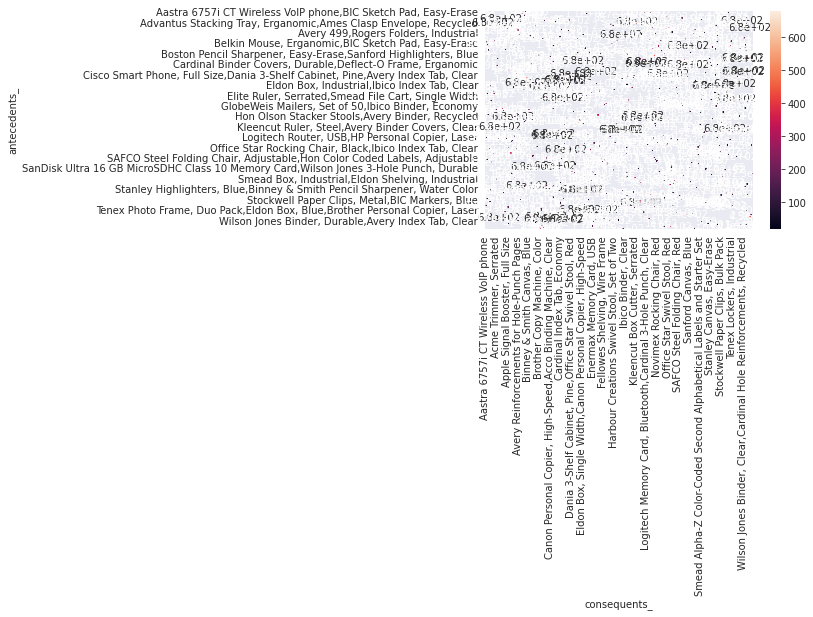

In [29]:
import seaborn as sns
# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [30]:
df= data.groupby(['Customer ID','Order_Date'])['Product Name']

In [31]:
newdata=df.first()

In [32]:
newdata

Customer ID  Order_Date
AA-10315102  2017-07-03                    Fiskars Trimmer, Serrated
             2020-01-07                  Konica Calculator, Wireless
AA-10315120  2018-05-16       Sauder Library with Doors, Traditional
AA-10315139  2019-09-19             Motorola Headset, with Caller ID
             2019-11-27                   Boston Canvas, Fluorescent
                                             ...                    
ZD-2192564   2017-02-21    Barricks Round Table, with Bottom Storage
ZD-219257    2017-09-19                Stockwell Rubber Bands, Metal
ZD-2192582   2018-11-26                           Tenex Frame, Black
             2020-06-18                     Sharp Fax Machine, Laser
ZD-2192596   2018-12-12            Memorex Numeric Keypad, Bluetooth
Name: Product Name, Length: 25719, dtype: object

In [33]:
new_data=data.set_index(['Customer ID','Order_Date']).sort_index()

In [34]:
new_data

Row ID                  Order ID  ... Postal Code Order_ID
Customer ID Order_Date                                    ...                     
AA-10315102 2017-07-03   27387  ID-2014-AA10315102-41823  ...       28540    41823
            2017-07-03   27385  ID-2014-AA10315102-41823  ...       28314    41823
            2017-07-03   27386  ID-2014-AA10315102-41823  ...       28540    41823
            2017-07-03   27384  ID-2014-AA10315102-41823  ...       33161    41823
            2020-01-07   27030  ID-2017-AA10315102-42742  ...       98115    42742
...                        ...                       ...  ...         ...      ...
ZD-219257   2017-09-19   25095    IN-2014-ZD219257-41901  ...       97756    41901
ZD-2192582  2018-11-26    2632   MX-2015-ZD2192582-42334  ...       53132    42334
            2020-06-18    2175   MX-2017-ZD2192582-42904  ...       88220    42904
ZD-2192596  2018-12-12   19029   IT-2015-ZD2192596-42350  ...       54703    42350
            2018-12-12   19030   IT-2015-ZD2192596-42350  ...       47201    42350

[51290 rows x 20 columns]

In [35]:
 new_data.columns

Index(['Row ID', 'Order ID', 'Ship Mode', 'Customer Name', 'Segment',
       'Product ID', 'Product Name', 'Sub-Category', 'Category', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'City', 'Region', 'Ship_Date', 'Postal Code', 'Order_ID'],
      dtype='object')

In [36]:
cols =['Row ID', 'Order ID', 'Ship Mode', 'Customer Name', 'Segment',
       'Product ID', 'Sub-Category', 'Category', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'City', 'Region', 'Ship_Date', 'Postal Code']

In [37]:
 new_data=new_data.drop(cols, axis='columns')

In [38]:
 new_data.head(15)

Product Name Order_ID
Customer ID Order_Date                                                           
AA-10315102 2017-07-03                         Fiskars Trimmer, Serrated    41823
            2017-07-03               Avery Shipping Labels, Alphabetical    41823
            2017-07-03                       SanDisk Numeric Keypad, USB    41823
            2017-07-03                          Elite Shears, High Speed    41823
            2020-01-07                       Konica Calculator, Wireless    42742
            2020-01-07  Hon File Folder Labels, Laser Printer Compatible    42742
AA-10315120 2018-05-16            Sauder Library with Doors, Traditional    42140
AA-10315139 2019-09-19                  Motorola Headset, with Caller ID    42632
            2019-09-19                          Avery Index Tab, Economy    42632
            2019-09-19                             Eldon Box, Industrial    42632
            2019-11-27                        Boston Canvas, Fluorescent    42701
            2020-06-24                 Advantus Stacking Tray, Erganomic    42910
            2020-08-04                     Samsung Audio Dock, Full Size    42951
            2020-08-04                    Nokia Speaker Phone, Full Size    42951
            2020-08-04                    Bush Floating Shelf Set, Metal    42951

In [39]:
# new_data.to_excel("transaction.xlsx")

In [40]:
 transaction_data = new_data.set_index(['Order_ID']).sort_index()

In [41]:
transaction_data.head(10)

,Product Name
Order_ID,
41640,"Tenex Box, Single Width"
41640,"Eaton Computer Printout Paper, 8.5 x 11"
41640,"Tenex Lockers, Blue"
41640,"Eldon Light Bulb, Duo Pack"
41640,"Acme Trimmer, High Speed"
41640,"Enermax Note Cards, Premium"
41641,"Okidata Inkjet, Wireless"
41642,"Nokia Headset, VoIP"
41642,"Avery Color Coded Labels, Laser Printer Compat..."


In [42]:
new_data

  

Product Name Order_ID
Customer ID Order_Date                                              
AA-10315102 2017-07-03            Fiskars Trimmer, Serrated    41823
            2017-07-03  Avery Shipping Labels, Alphabetical    41823
            2017-07-03          SanDisk Numeric Keypad, USB    41823
            2017-07-03             Elite Shears, High Speed    41823
            2020-01-07          Konica Calculator, Wireless    42742
...                                                     ...      ...
ZD-219257   2017-09-19        Stockwell Rubber Bands, Metal    41901
ZD-2192582  2018-11-26                   Tenex Frame, Black    42334
            2020-06-18             Sharp Fax Machine, Laser    42904
ZD-2192596  2018-12-12    Memorex Numeric Keypad, Bluetooth    42350
            2018-12-12     SanDisk Parchment Paper, Premium    42350

[51290 rows x 2 columns]

In [43]:
new_data['Product Name']=new_data['Product Name'].apply(lambda x : x.split(',')[0])
new_data=new_data[['Product Name', 'Order_ID']].groupby('Order_ID').agg(lambda x: x.tolist()).reset_index()
new_data['Product Name'] = [', '.join(l) for l in new_data['Product Name']]
new_data.to_excel('cleaned_transactions.xlsx')

In [44]:
market_basket_data = pd.read_excel('cleaned_transactions.xlsx',header=0)

In [45]:
market_basket_data.head()

,Unnamed: 0,Order_ID,Product Name
0,0,41640,"Tenex Box, Enermax Note Cards, Acme Trimmer, E..."
1,1,41641,Okidata Inkjet
2,2,41642,"Smead File Cart, Dania Corner Shelving, Hewlet..."
3,3,41643,"Binney & Smith Sketch Pad, SAFCO Chairmat, Mem..."
4,4,41644,"Hoover Stove, Sanford Canvas, Binney & Smith P..."


In [46]:
market_basket_data_new =market_basket_data['Product Name'].str.split(",", n = 20, expand = True)
market_basket_data_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,Tenex Box,Enermax Note Cards,Acme Trimmer,Eldon Light Bulb,Eaton Computer Printout Paper,Tenex Lockers,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Okidata Inkjet,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Smead File Cart,Dania Corner Shelving,Hewlett Fax and Copier,Stiletto Scissors,Breville Coffee Grinder,Rogers Folders,Advantus Rubber Bands,Hewlett Wireless Fax,Hon Rocking Chair,Belkin Numeric Keypad,SAFCO Chairmat,Hoover Microwave,Avery Color Coded Labels,Tenex Lockers,Chromcraft Round Table,Stockwell Staples,Novimex Swivel Stool,Cameo Interoffice Envelope,BIC Sketch Pad,Nokia Headset,None
3,Binney & Smith Sketch Pad,SAFCO Chairmat,Memorex Mouse,Kraft Peel and Seal,Harbour Creations File Folder Labels,Jiffy Interoffice Envelope,Jiffy Interoffice Envelope,Message Book,Boston Markers,Eldon Folders,Boston Pens,Avery Hole Reinforcements,Enermax Keyboard,Sharp Ink,Dania Classic Bookcase,Fiskars Letter Opener,None,None,None,None,None
4,Hoover Stove,Sanford Canvas,Binney & Smith Pencil Sharpener,SAFCO Boltless Steel Shelving,Avery 508,GBC Standard Plastic Binding Systems Combs,Rubbermaid Photo Frame,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,Brother Ink,Apple Audio Dock,Dania 3-Shelf Cabinet,Cardinal Binder,Stanley Markers,HP Personal Copier,Accos Staples,Xerox Cards & Envelopes,Epson Receipt Printer,Harbour Creations Swivel Stool,Brother Personal Copier,Hewlett Ink,BIC Pencil Sharpener,Stockwell Rubber Bands,Eldon Clock,Harbour Creations Legal Exhibit Labels,Breville Coffee Grinder,Wilson Jones Binding Machine,Memorex Router,Deflect-O Door Stop,"Stiletto Shears, Barricks Training Table, Fis..."
1425,Hoover Blender,Acco Binding Machine,Wilson Jones Index Tab,AT&T 1080 Corded phone,BIC Brite Liner Highlighters,SanDisk Mouse,Hon Chairmat,Logitech Numeric Keypad,Xerox Note Cards,Ames Manila Envelope,Deflect-O Frame,Avery Index Tab,Hon Legal Exhibit Labels,None,None,None,None,None,None,None,None
1426,Cardinal Binding Machine,Brother Fax Machine,Rogers Trays,Jiffy Interoffice Envelope,Tenex Shelving,Cameo Manila Envelope,Kraft Interoffice Envelope,Lesro Computer Table,Fellowes Lockers,Kraft Interoffice Envelope,Stockwell Paper Clips,Wilson Jones Binder,Hoover Stove,Smead File Cart,Kraft Peel and Seal,Jiffy Manila Envelope,Avery File Folder Labels,KitchenAid Blender,Belkin Mouse,Acco Binder Covers,"Hamilton Beach Stove, Fellowes File Cart, BIC..."
1427,Memorex Mouse,Harbour Creations Swivel Stool,Nu-Dell Executive Frame,Hand-Finished Solid Wood Document Frame,Acco Glide Clips,Hewlett Personal Copier,Binney & Smith Pencil Sharpener,Stiletto Trimmer,Dania Stackable Bookrack,Harbour Creations Removable Labels,Tenex Frame,Accos Paper Clips,Fellowes Box,Acco Binder,Binney & Smith Sketch Pad,Acco Index Tab,HP Fax and Copier,SAFCO Swivel Stool,Enermax Note Cards,Fellowes Shelving,"Jiffy Business Envelopes, Green Bar Cards & E..."


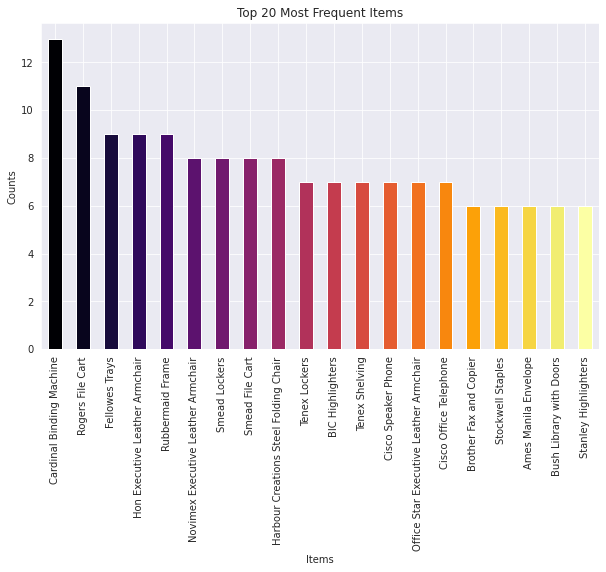

In [47]:
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
market_basket_data_new[0].value_counts().head(20).plot.bar(color = color)
plt.title('Top 20 Most Frequent Items')
plt.ylabel('Counts')
plt.xlabel('Items')
plt.show()

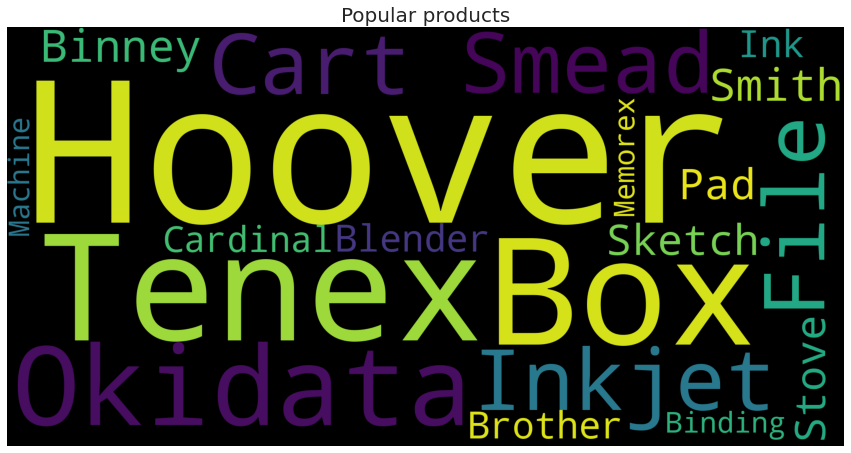

In [61]:
# !pip install wordcloud
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(width = 2000,  height = 1000, max_words = 20, colormap='viridis').generate(str(market_basket_data_new[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular products',fontsize = 20)
plt.show()

In [67]:
# !pip install networkx
import networkx as nx
market_basket_data_new['items'] = 'Items'
items = market_basket_data_new.truncate(before = -1, after = 15)
items = nx.from_pandas_edgelist(items, source = 'items', target = 0, edge_attr = True)

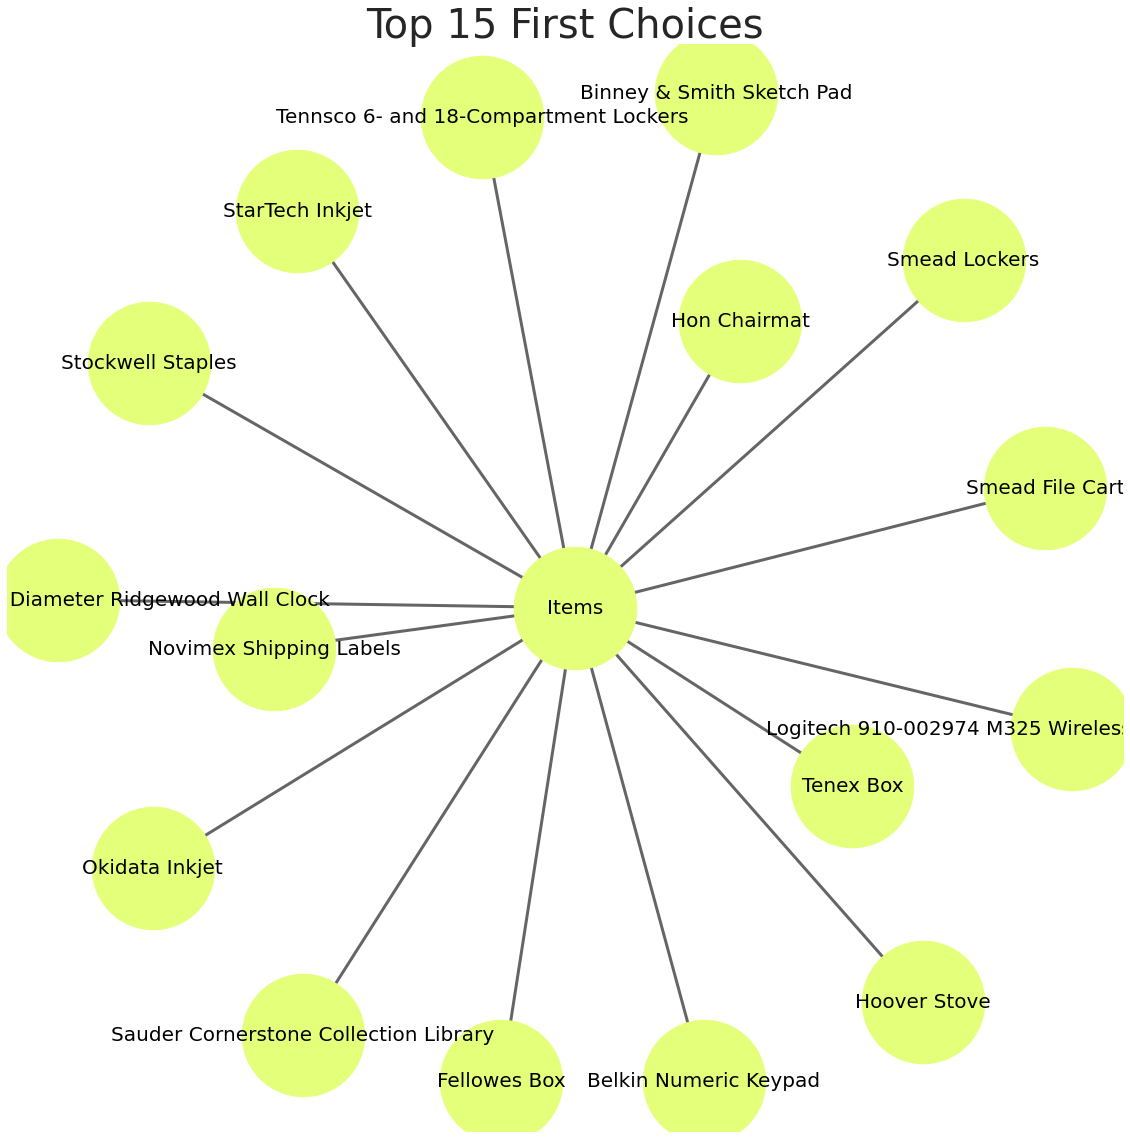

In [69]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(items)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(items, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(items, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(items, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [48]:
# transactions = []
# for i in range(0,len(df)):
#     transactions.append([str(df.values[i,j]) for j in range(0,100) if str(df.values[i,j])!='0'])
transactions = []
for i in range(0,len(market_basket_data_new)):
    transactions.append([str(market_basket_data_new.values[i,j]) for j in range(0,20)])

In [49]:
from mlxtend.preprocessing import TransactionEncoder
transac = TransactionEncoder()
dataset = transac.fit_transform(transactions)
dataset

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [50]:
df = pd.DataFrame(dataset, columns= transac.columns_)
df.head()

,#10 Gummed Flap White Envelopes,#10 Self-Seal White Envelopes,#10 White Business Envelopes,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes","1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",12 Colored Short Pencils,12-1/2 Diameter Round Wall Clock,2300 Heavy-Duty Transfer File Systems by Perma,24 Capacity Maxi Data Binder Racks,24-Hour Round Wall Clock,3.6 Cubic Foot Counter Height Office Refrigerator,36X48 HARDFLOOR CHAIRMAT,3D Systems Cube Printer,3M Hangers With Command Adhesive,3M Office Air Cleaner,3M Organizer Strips,3M Polarizing Light Filter Sleeves,3M Replacement Filter for Office Air Cleaner for 20' x 33' Room,4009 Highlighters,4009 Highlighters by Sanford,50 Colored Long Pencils,"6"" Cubicle Wall Clock",9-3/4 Diameter Round Wall Clock,ACCOHIDE 3-Ring Binder,ACCOHIDE Binder by Acco,APC 7 Outlet Network SurgeArrest Surge Protector,ARKON Windshield Dashboard Air Vent Car Mount Holder,AT&T 1070 Corded Phone,AT&T 1080 Corded phone,AT&T 1080 Phone,AT&T 17929 Lendline Telephone,AT&T 841000 Phone,AT&T CL2909,AT&T CL82213,AT&T CL83451 4-Handset Telephone,AT&T EL51110 DECT,AT&T SB67148 SynJ,AT&T TR1909W,...,Tripp Lite TLP810NET Broadband Surge for Modem/Fax,Verbatim 25 GB 6x Blu-ray Single Layer Recordable Disc,Vtech CS6719,Wausau Papers Astrobrights Colored Envelopes,Wilson Jones 3-Hole Punch,Wilson Jones Binder,Wilson Jones Binder Covers,Wilson Jones Binding Machine,Wilson Jones Hole Reinforcements,Wilson Jones Index Tab,Wilson SignalBoost 841262 DB PRO Amplifier Kit,Wirebound Message Book,Wirebound Message Books,Xerox 1885,Xerox 1889,Xerox 1893,Xerox 1908,Xerox 191,Xerox 1912,Xerox 1914,Xerox 1919,Xerox 1945,Xerox 1948,Xerox 1952,Xerox 1960,Xerox 1966,Xerox 1967,Xerox 1994,Xerox 1996,Xerox 1997,Xerox 226,Xerox 231,Xerox Cards & Envelopes,Xerox Computer Printout Paper,Xerox Memo Slips,Xerox Parchment Paper,Zebra GX420t Direct Thermal/Thermal Transfer Printer,Zebra Zazzle Fluorescent Highlighters,i.Sound Portable Power - 8000 mAh,invisibleSHIELD by ZAGG Smudge-Free Screen Protector
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [51]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(df, min_support=0.003, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))

In [52]:
frequent_itemsets.head(20)

,support,itemsets,length
0,0.004199,"( #10- 4 1/8"" x 9 1/2"" Recycled Envelopes)",1
1,0.004199,( 3M Organizer Strips),1
2,0.004899,( AT&T 17929 Lendline Telephone),1
3,0.003499,( AT&T 841000 Phone),1
4,0.046886,( Acco 3-Hole Punch),1
5,0.057383,( Acco Binder),1
6,0.051784,( Acco Binder Covers),1
7,0.051784,( Acco Binding Machine),1
8,0.003499,( Acco D-Ring Binder w/DublLock),1
9,0.004199,( Acco Data Flex Cable Posts For Top & Bottom ...,1


In [53]:
frequent_itemsets[frequent_itemsets['length'] >= 2].head(20)

,support,itemsets,length
776,0.004199,"( Acco 3-Hole Punch, Acco Binder)",2
777,0.004199,"( Acco 3-Hole Punch, Acco Binder Covers)",2
778,0.003499,"( Acco 3-Hole Punch, Acco Binding Machine)",2
779,0.003499,"( Acco 3-Hole Punch, Acco Hole Reinforcements)",2
780,0.004199,"( Acco 3-Hole Punch, Avery Binder Covers)",2
781,0.004199,"( Acco 3-Hole Punch, Avery Index Tab)",2
782,0.003499,"( Acco 3-Hole Punch, Breville Toaster)",2
783,0.003499,"( Acco 3-Hole Punch, Cardinal Binder Covers)",2
784,0.003499,"( Acco 3-Hole Punch, Fellowes Box)",2
785,0.003499,"( Acco 3-Hole Punch, Fellowes Folders)",2


In [54]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( Acco 3-Hole Punch),( Acco Binder),0.046886,0.057383,0.004199,0.089552,1.560612,0.001508,1.035334
1,( Acco Binder),( Acco 3-Hole Punch),0.057383,0.046886,0.004199,0.073171,1.560612,0.001508,1.028360
2,( Acco 3-Hole Punch),( Acco Binder Covers),0.046886,0.051784,0.004199,0.089552,1.729326,0.001771,1.041483
3,( Acco Binder Covers),( Acco 3-Hole Punch),0.051784,0.046886,0.004199,0.081081,1.729326,0.001771,1.037212
4,( Acco 3-Hole Punch),( Acco Binding Machine),0.046886,0.051784,0.003499,0.074627,1.441105,0.001071,1.024685
5,( Acco Binding Machine),( Acco 3-Hole Punch),0.051784,0.046886,0.003499,0.067568,1.441105,0.001071,1.022180
6,( Acco 3-Hole Punch),( Acco Hole Reinforcements),0.046886,0.048985,0.003499,0.074627,1.523454,0.001202,1.027709
7,( Acco Hole Reinforcements),( Acco 3-Hole Punch),0.048985,0.046886,0.003499,0.071429,1.523454,0.001202,1.026431
8,( Acco 3-Hole Punch),( Avery Binder Covers),0.046886,0.047586,0.004199,0.089552,1.881914,0.001968,1.046094
9,( Avery Binder Covers),( Acco 3-Hole Punch),0.047586,0.046886,0.004199,0.088235,1.881914,0.001968,1.045351


In [56]:
rules[(rules['lift'] >= 4) & (rules['confidence'] >= 0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3678,"( Fellowes Lockers, Stanley Canvas)",( Ibico Binder),0.004899,0.041987,0.003499,0.714286,17.011905,0.003293,3.353044
3680,"( Stanley Canvas, Ibico Binder)",( Fellowes Lockers),0.004199,0.048985,0.003499,0.833333,17.011905,0.003293,5.706088
